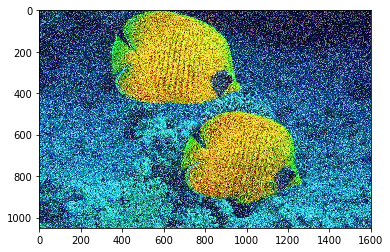

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('datasets/images/fish.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

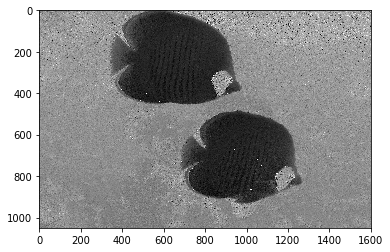

In [2]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:,:,0]
plt.imshow(h, cmap="gray")
plt.show()

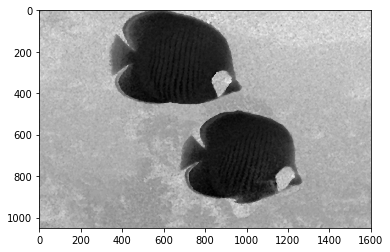

In [3]:
hm = cv2.medianBlur(h, 9)
plt.imshow(hm, cmap="gray")
plt.show()

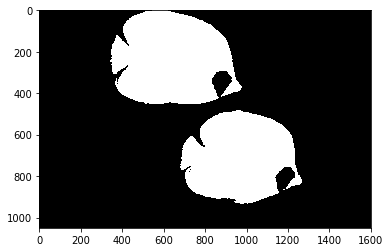

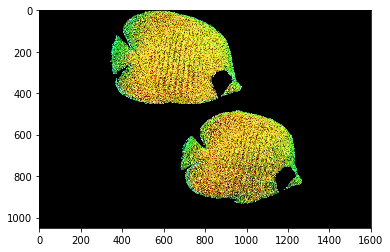

In [4]:
mask = np.uint8((hm < 80) * 255)
plt.imshow(mask, cmap="gray")
plt.show()
mask3d = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
cut = mask3d & img_rgb
plt.imshow(cut)
plt.show()

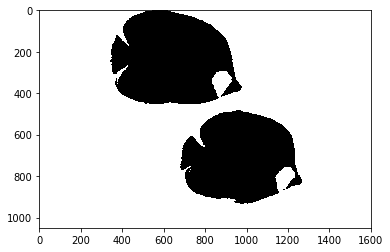

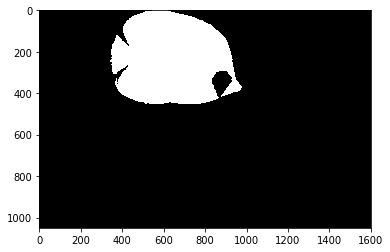

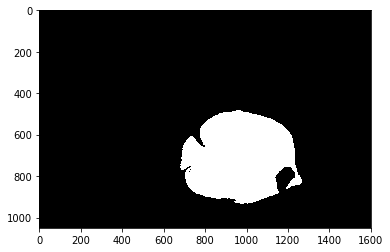

In [5]:
n, components = cv2.connectedComponents(mask, connectivity=8)
image_area = mask.shape[0] * mask.shape[1]
fishes = []
for c in range(n):
    fish = cv2.inRange(components, c, c)
    fish_area = np.count_nonzero(fish)
    if 0.01 < (fish_area / image_area):
        fishes.append(fish)
        plt.imshow(fish, cmap='gray')
        plt.show()

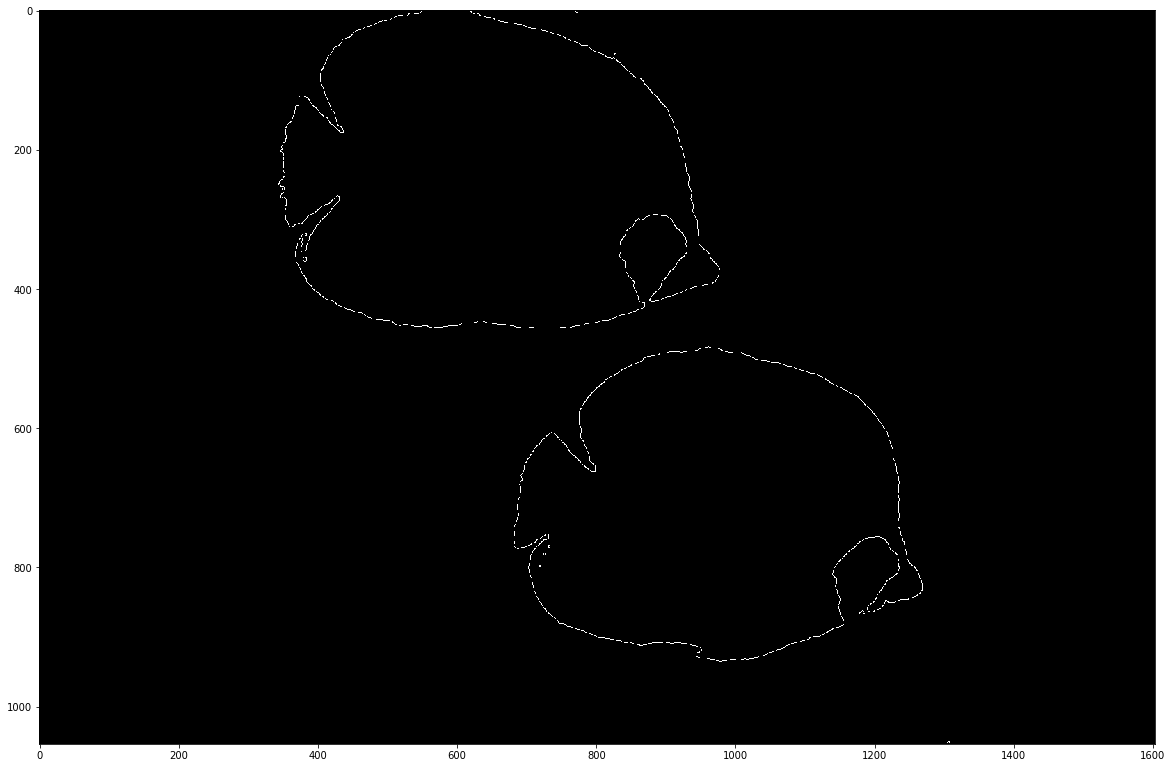

In [6]:
# draw 2 additional pixels to the image borders
mask = cv2.copyMakeBorder(mask, 2, 2, 2, 2, cv2.BORDER_CONSTANT)
canny_output = cv2.Canny(mask, 0, 50)
plt.figure(figsize=(20,15))
plt.imshow(canny_output, cmap='gray')
plt.show()

Contour area=188298.0, length=2309.3291988372803
	Hull area=202758.5, length=1643.2055895328522
Contour area=319.0, length=5212.246271491051
	Hull area=229593.0, length=1771.4434163570404


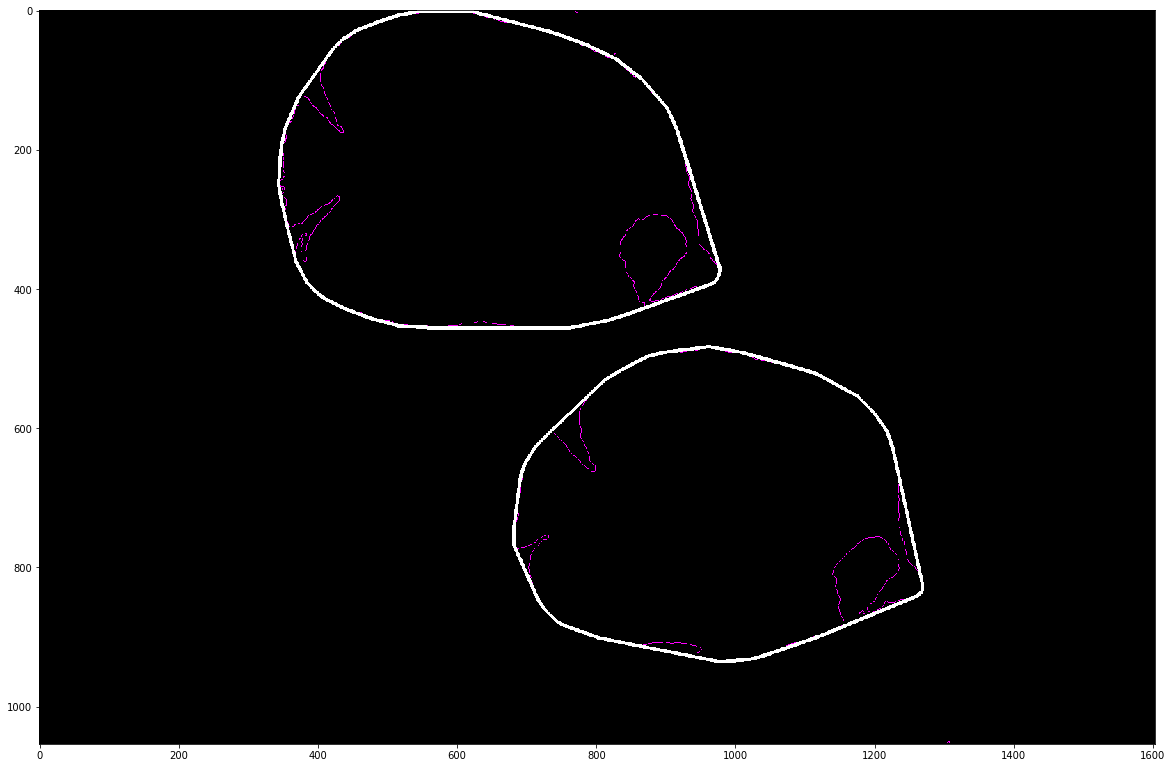

In [7]:
# see https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html
contours, _ = cv2.findContours(
                        canny_output, 
                        cv2.RETR_EXTERNAL,      # outer contours only
                        cv2.CHAIN_APPROX_SIMPLE    # approfimation for linear segments of contour
                )

drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

# Find the convex hull object for each contour
hull_list = []
for i, contour in enumerate(contours):
    colorC = (255, 0, 255)
    cv2.drawContours(drawing, contours, i, colorC)
    area, length = cv2.contourArea(contour), cv2.arcLength(contour, False)
    if area < 40:
        continue
    print("Contour area={}, length={}".format(area, length))
    hull = cv2.convexHull(contour)
    hull_list.append(hull)
    area, length = cv2.contourArea(hull), cv2.arcLength(hull, False)
    print("\tHull area={}, length={}".format(area, length))
    
# + hull results
for hull in hull_list:
    colorH = (255, 255, 255)
    cv2.drawContours(drawing, [hull], 0, colorH, thickness=3)

# Show in a window
plt.figure(figsize=(20,15))
plt.imshow(drawing)
plt.show()

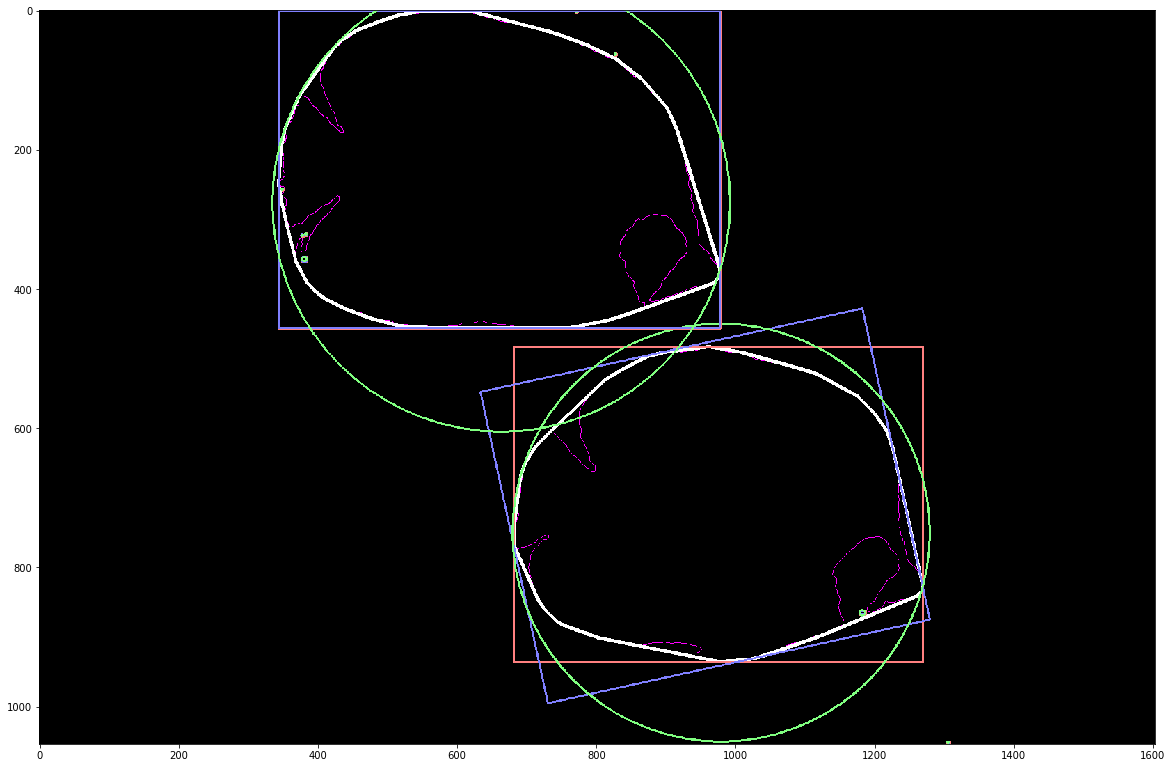

In [8]:
# see also https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html
for contour in contours:
    bboxColorA = (255, 128, 128)
    bboxColorB = (128, 128, 255)
    bboxColorC = (128, 255, 128)
    
    # aligned rectangle
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(drawing, (x, y), (x + w, y + h), bboxColorA, 2)
    
    # smallest rectangle
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(drawing, [box], 0, bboxColorB, thickness=2)
    
    # smallest circle
    point, rad = cv2.minEnclosingCircle(contour)
    point = (int(point[0]), int(point[1]))
    cv2.circle(drawing, point, int(rad), bboxColorC, 2)

plt.figure(figsize=(20,15))
plt.imshow(drawing)
plt.show()

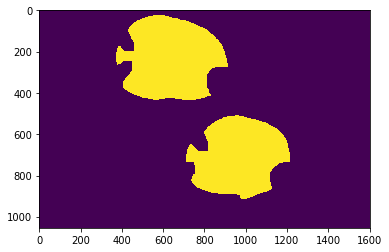

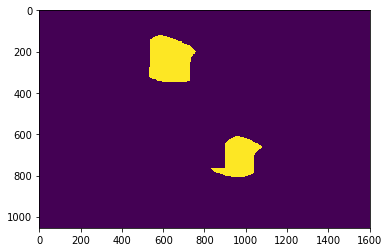

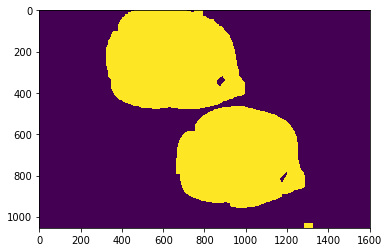

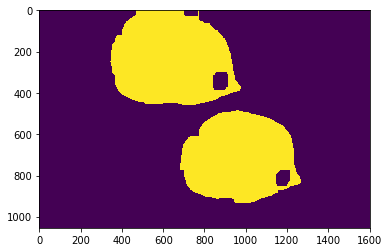

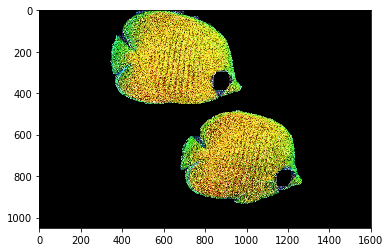

In [9]:
# for skeleton go to http://opencvpython.blogspot.com/2012/05/skeletonization-using-opencv-python.html
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(mask, kernel, iterations=10)
plt.imshow(erosion)
plt.show()
erosion = cv2.erode(mask, kernel, iterations=50)
plt.imshow(erosion)
plt.show()
dilation = cv2.dilate(mask, kernel, iterations=10)
plt.imshow(dilation)
plt.show()

#######################################################

## see opening and closing!
## https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=12)
plt.imshow(closing)
plt.show()

mask3d2 = cv2.cvtColor(closing[2:-2,2:-2], cv2.COLOR_GRAY2RGB)
cut2 = mask3d2 & img_rgb
plt.imshow(cut2)
plt.show()